In [40]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')

from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kwyng\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
df = pd.read_parquet("../datasets/cleaned_datasets/demographic_infused_philly_c.parquet")

df_temp = df.head(5).copy()

In [45]:
def get_vader(text):
    return SentimentIntensityAnalyzer().polarity_scores(text)['compound']

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
df['sentiment_score'] = df['clean_text'].apply(get_vader)
df['subjectivity_score'] = df['clean_text'].apply(get_subjectivity)

In [47]:
df.head()

,review_id,user_id,business_id,stars_rev,text,date,name,address,city,state,...,"$15,000_to_$24,999","$25,000_to_$34,999","$35,000_to_$49,999","$50,000_to_$64,999","$65,000_to_$74,999","$75,000_to_$99,999","$100,000_or_more",clean_text,sentiment_score,subjectivity_score
0,J1LZjzbs5bFubvS135SD2g,5TE19zTjTIPq1HANACN7sw,dChRGpit9fM_kZK5pafNyA,5,Had a great big meal with family and we loved ...,2020-01-20 00:36:44,The Love,130 S 18th St,Philadelphia,PA,...,167,507,913,"1,595","1,432","1,943","6,079",great big meal family loved got lot appetizer ...,0.9274,0.558333
1,ecMiAOFucDM3zwXYfY-Q6A,5Z8S9OsHWCnE8wbxk1poQQ,s3Q1J4XEVOBiZy9dYUpqpg,5,Many locations. All have lines so be prepared...,2020-02-16 22:52:13,Green Eggs Cafe,2327 Gaul St,Philadelphia,PA,...,504,547,"1,440","2,430","1,291","2,616","4,256",many location line prepared wait well worth fo...,0.9633,0.535714
2,yuFQRhHo3z4TgE6drPXSgg,hcw7ndQKWGEH4P7BYAlG9w,JUlsvVAvZvGHWFfkKm0nlg,5,Compliments to the chef and to the rest of the...,2020-01-12 00:55:58,El Camino Real,1040 N 2nd St,Philadelphia,PA,...,507,312,798,860,"1,182","2,147","3,577",compliment chef rest staff hosting lab complai...,0.8834,0.535714
3,Zdh0_HtE724MnohLOrB5Iw,OYaEBYLBrLY4mla8bOMbnA,9b0Mrvs6uJu2jJqet_Jwew,4,I decided to try this spot out -- and it didn'...,2020-01-15 19:29:25,Asia Nail 2 & Spa,1720 Washington Ave,Philadelphia,PA,...,646,"1,157","2,050","2,509","1,537","3,754","7,780",decided try spot didnt disappoint starter prob...,0.9848,0.572222
4,y_XYEZk2Cin-q4N0czeaYw,_9VhEn9zaB-6txE3STNfLw,PYUI1OJVksGUbCrteU68bw,3,"First off, finding parking is atrocious. Your ...",2020-02-17 13:53:51,Bourbon & Branch,705 N 2nd St,Philadelphia,PA,...,507,312,798,860,"1,182","2,147","3,577",first finding parking atrocious best bet uberl...,0.9630,0.608134


In [52]:
correlation, p_value = pearsonr(df['sentiment_score'], df['stars_rev'])
print(f"Correlation: {correlation:.3f}, p-value: {p_value:.5f}")

correlation, p_value = pearsonr(df['subjectivity_score'], df['stars_rev'])
print(f"Correlation: {correlation:.3f}, p-value: {p_value:.5f}")

Correlation: 0.657, p-value: 0.00000
Correlation: 0.225, p-value: 0.00000


C:\Users\kwyng\AppData\Local\Temp\ipykernel_9916\2984429782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zip_sentiment['postal_code'], y=zip_sentiment['sentiment_score'], palette="coolwarm")


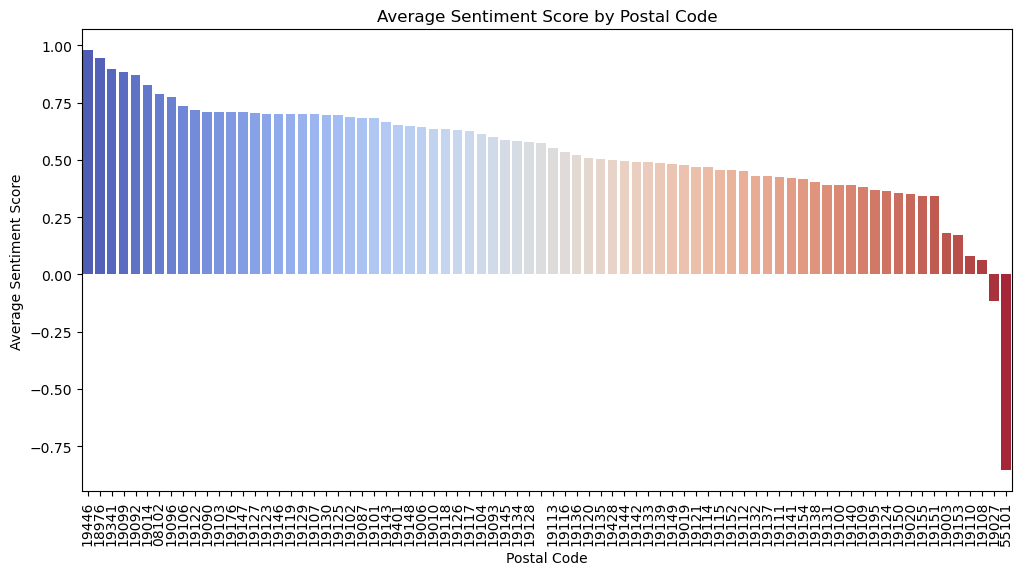

In [53]:
zip_sentiment = df.groupby('postal_code')['sentiment_score'].mean().reset_index()
zip_sentiment = zip_sentiment.sort_values(by='sentiment_score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=zip_sentiment['postal_code'], y=zip_sentiment['sentiment_score'], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Sentiment Score by Postal Code")
plt.xlabel("Postal Code")
plt.ylabel("Average Sentiment Score")
plt.show()


C:\Users\kwyng\AppData\Local\Temp\ipykernel_9916\236797754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zip_subjectivity['postal_code'], y=zip_subjectivity['subjectivity_score'], palette="coolwarm")


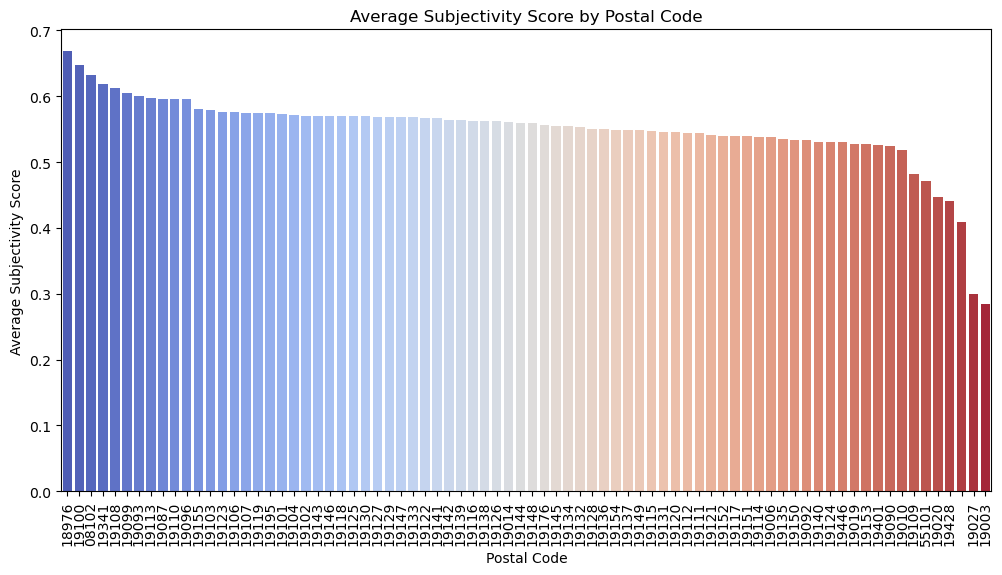

In [54]:
zip_subjectivity = df.groupby('postal_code')['subjectivity_score'].mean().reset_index()
zip_subjectivity = zip_subjectivity.sort_values(by='subjectivity_score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=zip_subjectivity['postal_code'], y=zip_subjectivity['subjectivity_score'], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Subjectivity Score by Postal Code")
plt.xlabel("Postal Code")
plt.ylabel("Average Subjectivity Score")
plt.show()


In [56]:
df.groupby('postal_code').count()

,review_id,user_id,business_id,stars_rev,text,date,name,address,city,state,...,"$15,000_to_$24,999","$25,000_to_$34,999","$35,000_to_$49,999","$50,000_to_$64,999","$65,000_to_$74,999","$75,000_to_$99,999","$100,000_or_more",clean_text,sentiment_score,subjectivity_score
postal_code,,,,,,,,,,,,,,,,,,,,,
,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,4,4,4
08102,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,0,9,9,9
18976,5,5,5,5,5,5,5,5,5,5,...,0,0,0,0,0,0,0,5,5,5
19003,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1
19006,39,39,39,39,39,39,39,39,39,39,...,0,0,0,0,0,0,0,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19341,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,0,0,13,13,13
19401,98,98,98,98,98,98,98,98,98,98,...,0,0,0,0,0,0,0,98,98,98
19428,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,0,0,7,7,7


In [ ]:
"C:\Users\kwyng\Downloads\Zipcodes_Poly.geojson"